# Logistic Regression

### <font color=green>Importing Required Libraries</font>

In [2]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Q-Q Plot
import scipy.stats as stats

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

# To save the model
import pickle

### <font color=green>Reading the dataset</font>

In [3]:
df = pd.read_csv(r"D:\iNeuron\Machine Learning\Implementation\Logistic Regression\Dataset\Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

<font color=#4A235A >Info about dataset and its attributess</font>
1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### <font color=green>Checking the null value</font>

In [4]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.drop([122,123,167],axis = 0,inplace = True)

In [6]:
df.shape

(243, 14)

### Data Cleaning

In [7]:
# columns name having extra spaces
columns_with_spaces = [fea for fea in df.columns if " " in fea]
columns_with_spaces

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [8]:
# removing the space 
df.columns = df.columns.str.strip()
# strip() method Remove spaces at the beginning and at the end of the string
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [9]:
# function to remove extra space in data
def remove_space(x):
    return x.replace(" ","")

In [10]:
df['Classes'] = df['Classes'].apply(remove_space)
df.head(2)


day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18    0  65.7  3.4  7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13  1.3  64.4  4.1  7.6    1  3.9  0.4   

   Classes  
0  notfire  
1  notfire

### <font color=green>Creating Region feature</font>

In [11]:
df.loc[:122,'Region'] = 0 # Bejaia region
df.loc[122:,'Region'] = 1 #  Sidi Bel-abbes region 

df.iloc[120:125]

day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
120  29    09  2012          26  80  16  1.8  47.4  2.9  7.7  0.3    3  0.1   
121  30    09  2012          25  78  14  1.4    45  1.9  7.5  0.2  2.4  0.1   
124  01    06  2012          32  71  12  0.7  57.1  2.5  8.2  0.6  2.8  0.2   
125  02    06  2012          30  73  13    4  55.7  2.7  7.8  0.6  2.9  0.2   
126  03    06  2012          29  80  14    2  48.7  2.2  7.6  0.3  2.6  0.1   

     Classes  Region  
120  notfire     0.0  
121  notfire     0.0  
124  notfire     1.0  
125  notfire     1.0  
126  notfire     1.0

### <font color=green>Datatypes and Describe</font>

In [12]:
# here it is visible that all datatypes are in object 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.5+ KB


### <font color=green>Convert notfire and fire to 0 and 1 respectively for Classes feature</font>

In [14]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [15]:
df['Classes'] = df['Classes'].replace({"notfire":0,'fire':1})
df['Classes'].unique()

array([0, 1], dtype=int64)

### <font color=green>Changing datatype to Numerical from object</font>

In [16]:
###### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert = {
    'day':'int64', 'month':'int64', 'year':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64', 
    'Rain':'float64', 'FFMC':'float64','DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
    'FWI':'float64', 'Classes':'int64', 'Region':'float64'
}

df = df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

- So, all the features are converted from categorical to `numerical datatypes`

### <font color=green>Now again check the null value and duplicates</font>

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
df.duplicated().value_counts()

False    243
dtype: int64

In [19]:
df.shape

(243, 15)

- After data cleaning there are 243 rows and 15 columns.
- There is no null value in dataset.
- There is no duplicate observation in dataset

### <font color=green>Creating a copy of dataframe from original Dataframe</font>

In [20]:
data = df.copy()
data.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

### <font color=green>Statistical Analysis</font>

In [23]:
data.cov()

day     month  year  Temperature          RH         Ws  \
day           78.190729 -0.003639   0.0     3.119138   -9.969476   1.188603   
month         -0.003639  1.242764   0.0    -0.229653   -0.681903  -0.124987   
year           0.000000  0.000000   0.0     0.000000    0.000000   0.000000   
Temperature    3.119138 -0.229653   0.0    13.162670  -35.043482  -2.901949   
RH            -9.969476 -0.681903   0.0   -35.043482  219.874333  10.173809   
Ws             1.188603 -0.124987   0.0    -2.901949   10.173809   7.903887   
Rain          -1.993174  0.077762   0.0    -2.372850    6.604836   0.965886   
FFMC          28.544043  0.272433   0.0    35.222858 -137.215388  -6.718952   
DMC           53.863133  0.938676   0.0    21.837668  -75.071928  -0.025120   
DC           222.524339  6.722457   0.0    65.071727 -160.400449  10.604530   
ISI            6.632060  0.303838   0.0     9.101371  -42.298446   0.099643   
BUI           65.061368  1.349400   0.0    23.734918  -74.653741   1.257586   
FWI           23.079143  0.685464   0.0    15.297068  -64.096917   0.677079   
Classes        0.891321  0.013298   0.0     0.930330   -3.184454  -0.097745   
Region         0.003639  0.001037   0.0     0.489984   -2.991651  -0.255178   

                  Rain        FFMC         DMC           DC         ISI  \
day          -1.993174   28.544043   53.863133   222.524339    6.632060   
month         0.077762    0.272433    0.938676     6.722457    0.303838   
year          0.000000    0.000000    0.000000     0.000000    0.000000   
Temperature  -2.372850   35.222858   21.837668    65.071727    9.101371   
RH            6.604836 -137.215388  -75.071928  -160.400449  -42.298446   
Ws            0.965886   -6.718952   -0.025120    10.604530    0.099643   
Rain          4.012837  -15.634746   -7.169025   -28.456455   -2.891688   
FFMC        -15.634746  205.912204  107.342972   347.051372   44.113113   
DMC          -7.169025  107.342972  153.587434   517.427748   35.032228   
DC          -28.456455  347.051372  517.427748  2272.009994  100.718521   
ISI          -2.891688   44.113113   35.032228   100.718521   17.257659   
BUI          -8.546509  120.872510  173.203205   638.862525   38.071147   
FWI          -4.835502   73.791799   80.764530   262.277746   28.526552   
Classes      -0.377380    5.487161    3.606817    12.106907    1.517740   
Region       -0.040159    1.597815    1.192729    -1.880308    0.547815   

                    BUI         FWI    Classes    Region  
day           65.061368   23.079143   0.891321  0.003639  
month          1.349400    0.685464   0.013298  0.001037  
year           0.000000    0.000000   0.000000  0.000000  
Temperature   23.734918   15.297068   0.930330  0.489984  
RH           -74.653741  -64.096917  -3.184454 -2.991651  
Ws             1.257586    0.677079  -0.097745 -0.255178  
Rain          -8.546509   -4.835502  -0.377380 -0.040159  
FFMC         120.872510   73.791799   5.487161  1.597815  
DMC          173.203205   80.764530   3.606817  1.192729  
DC           638.862525  262.277746  12.106907 -1.880308  
ISI           38.071147   28.526552   1.517740  0.547815  
BUI          202.447968   90.831493   4.147920  0.637377  
FWI           90.831493   55.362048   2.659303  0.734784  
Classes        4.147920    2.659303   0.246948  0.040421  
Region         0.637377    0.734784   0.040421  0.251029

In [117]:
data.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

### <font color=green>Checking the distribution of the features</font>

In [24]:
len(df.columns)

15

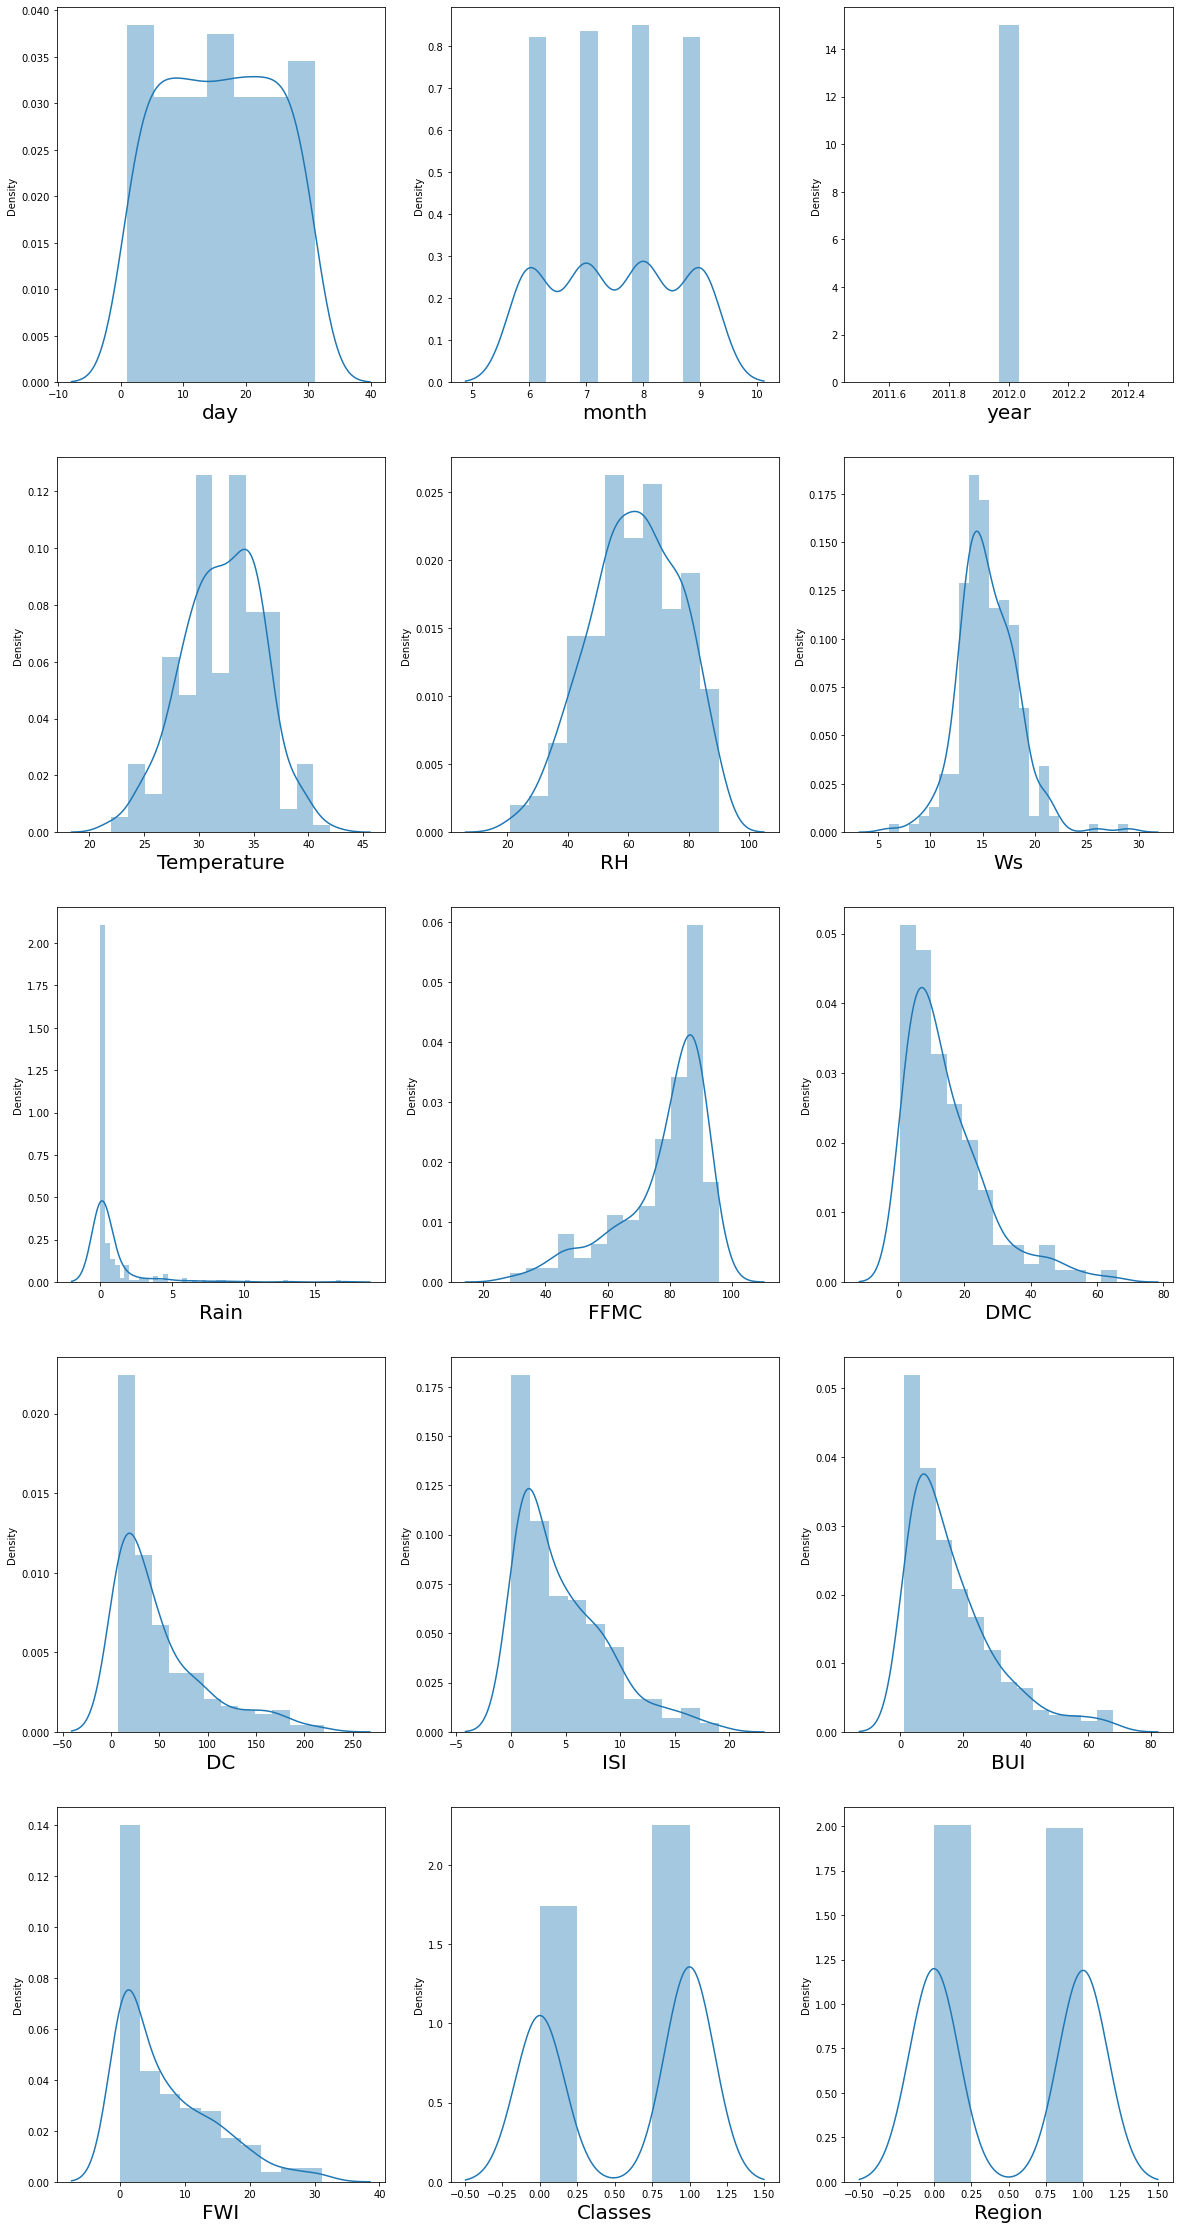

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column],kde= True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

- `Rain`, `DMC`, `DC`, `FWI`, `ISI`, `BUI` are rightly skewed (log normal distribution)
- There is no variance in the year attribute

## <font color=green>Univariate Analysis</font>

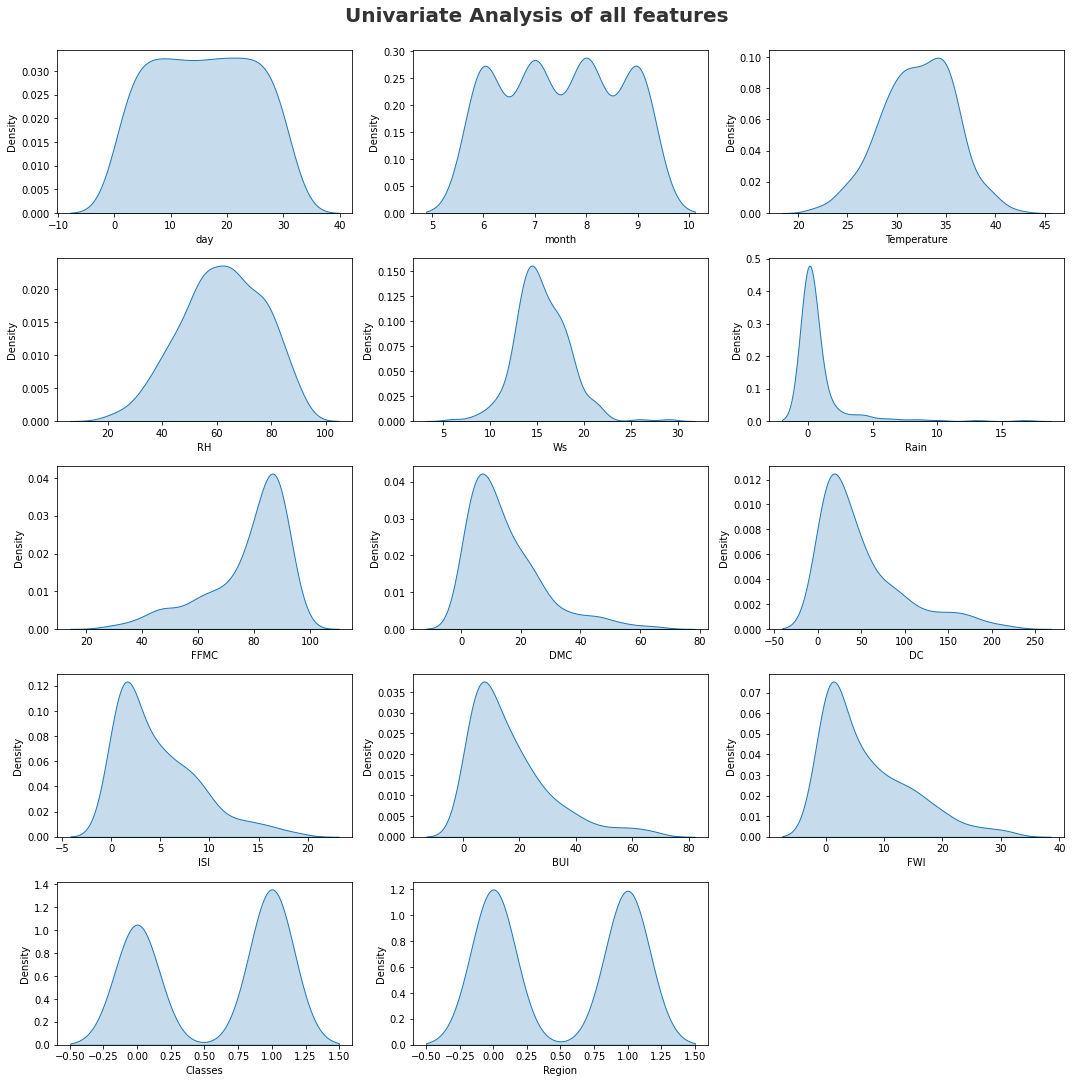

In [46]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data[data.columns[i]], shade =True, palette="ch:s=.25,rot=-.25")
    plt.xlabel(data.columns[i])
    plt.tight_layout()

## <font color=green>Multivariate Analysis</font>

<Figure size 1080x1080 with 0 Axes>

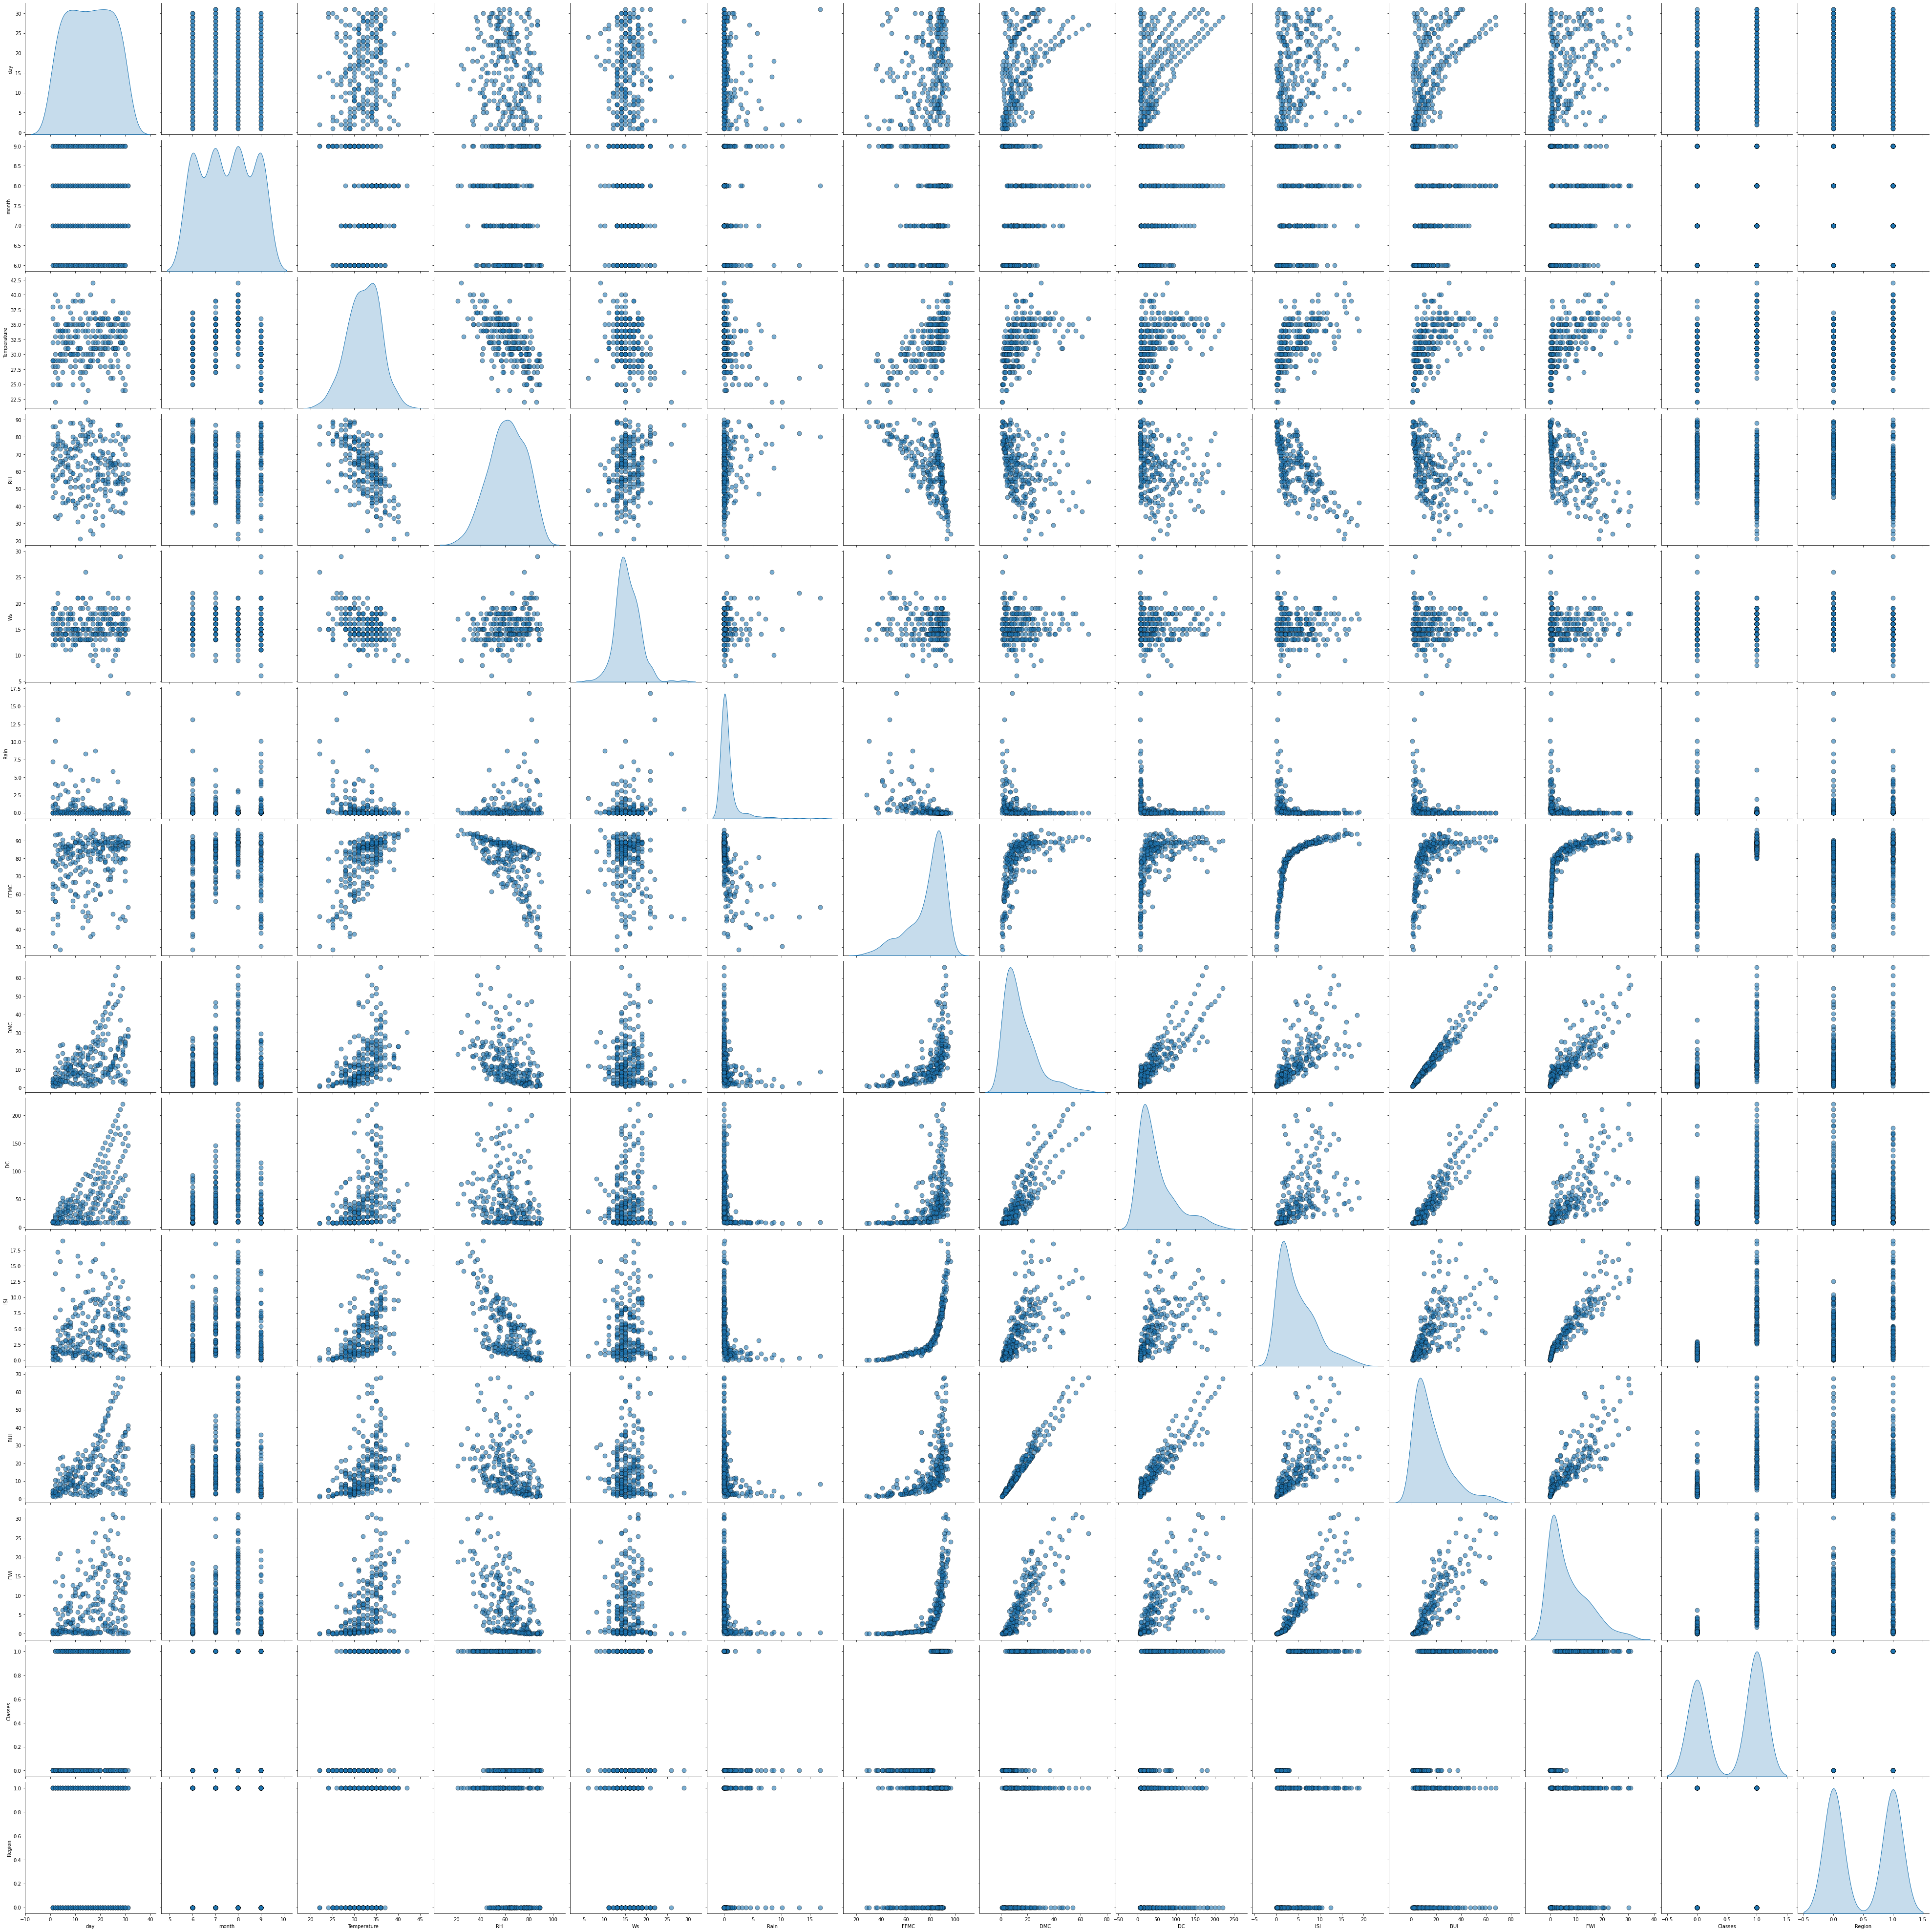

In [45]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',palette="ch:s=.25,rot=-.25",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [30]:
## Drop Year columns
data.drop("year", axis = 1, inplace = True)

## <font color=green>Heatmap of Correlation</font>

<AxesSubplot: >

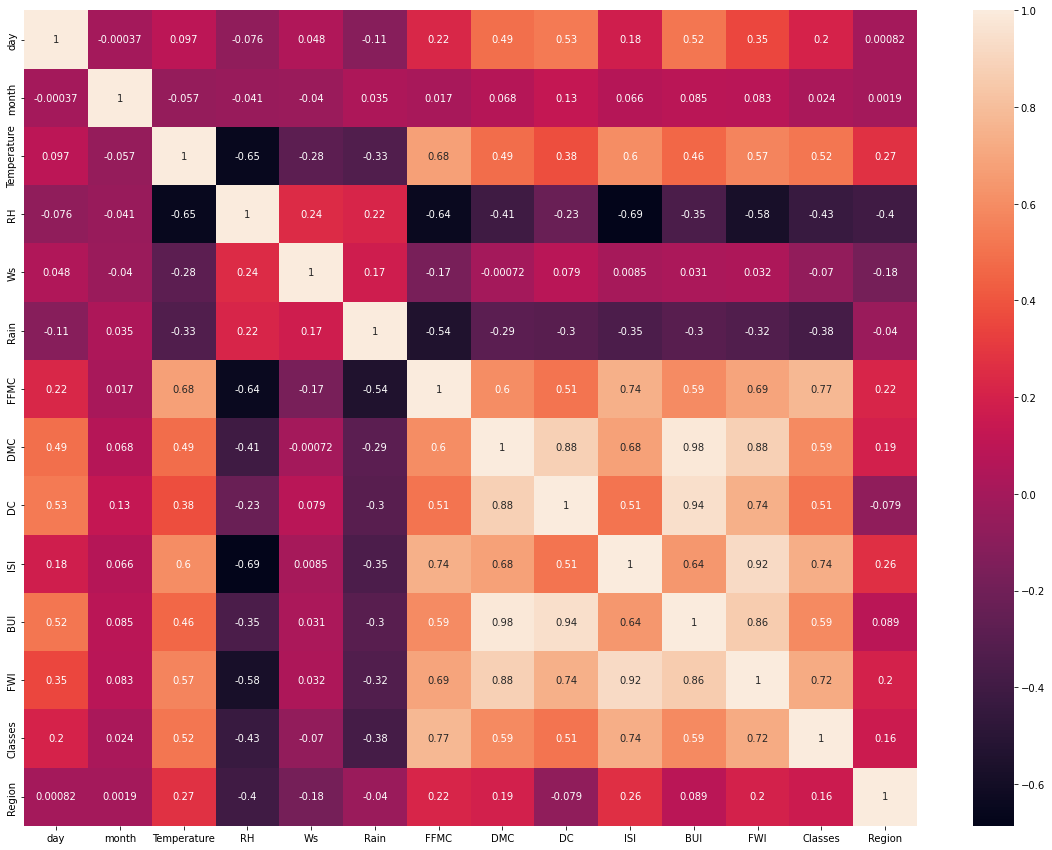

In [31]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

## <font color=green>Visualisation of Target Feature</font>

In [32]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot: xlabel='Region', ylabel='Classes'>

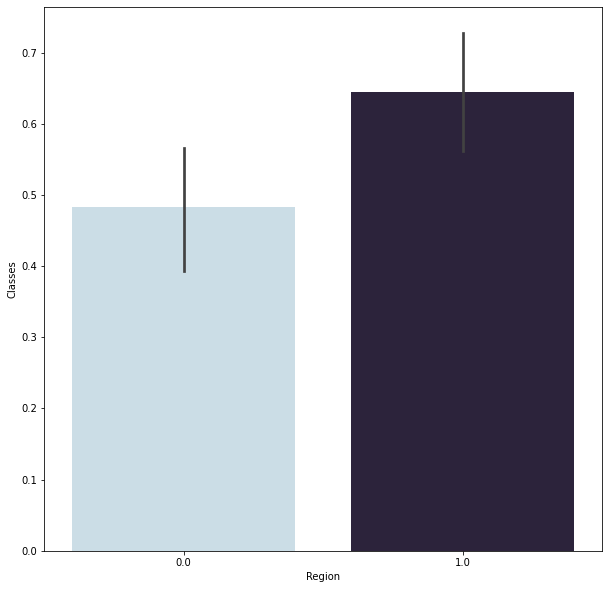

In [44]:
plt.figure(figsize = (10,10))
sns.barplot(x= 'Region', y = 'Classes', data= data, palette="ch:s=.25,rot=-.25")

- `Sidi-Bel Abbes region` has most of the fire happen

## <font color=green>Visualisation of Temperature Feature</font>

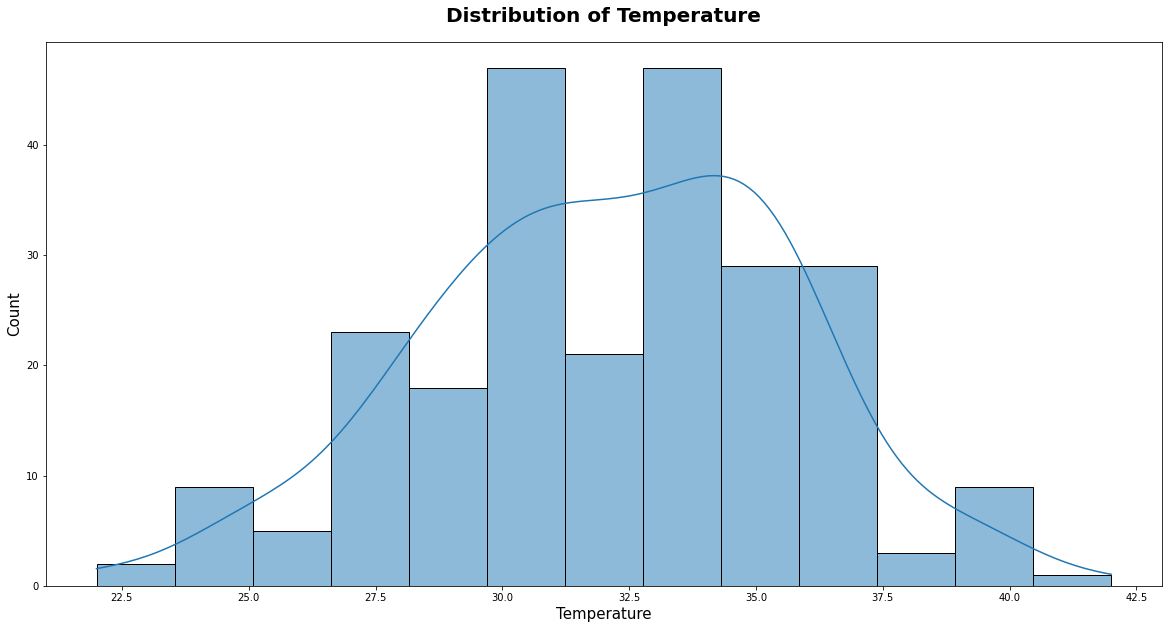

In [39]:
plt.figure(figsize = (20,10))
sns.histplot(data['Temperature'],kde = True, palette="ch:s=.25,rot=-.25")
plt.title("Distribution of Temperature",weight = 'bold',fontsize=20,pad=20)
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

- `Temperature` occur most of the time in range 32.5 to 35.0

## <font color=green>Highest Temperature Attained</font>

<AxesSubplot: xlabel='Temperature', ylabel='Classes'>

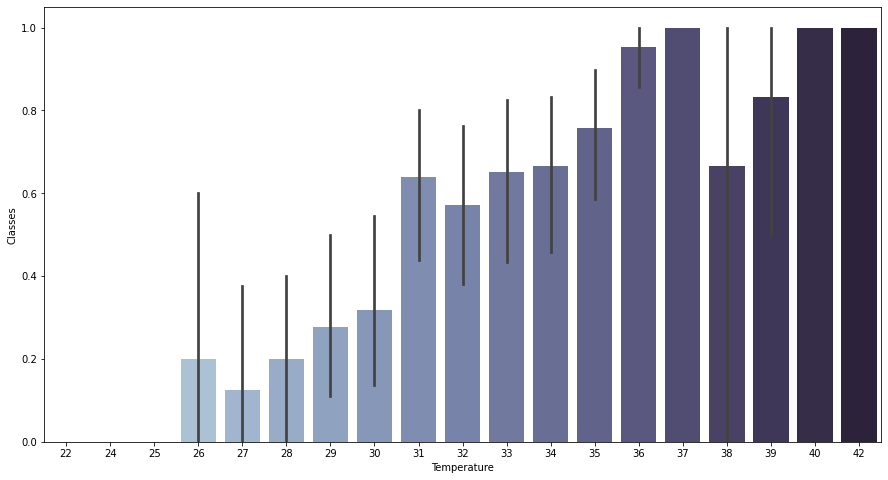

In [42]:
plt.figure(figsize = (15,8))
sns.barplot(x="Temperature",y="Classes",data=data, palette="ch:s=.25,rot=-.25")

- Highest Temperature is `37,40` and `42`

## <font color=green>Which region is mostly effected by rain</font>

<AxesSubplot: xlabel='Region', ylabel='Rain'>

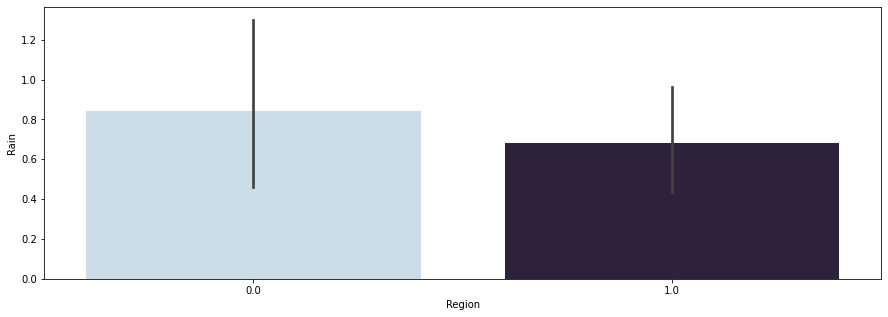

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['Region'], y = data['Rain'], palette="ch:s=.25,rot=-.25")

- `Bejaia region`  is the region in which most of the time rain happens

## <font color=green>Which region is mostly effected by Temperature</font>

<AxesSubplot: xlabel='Region', ylabel='Temperature'>

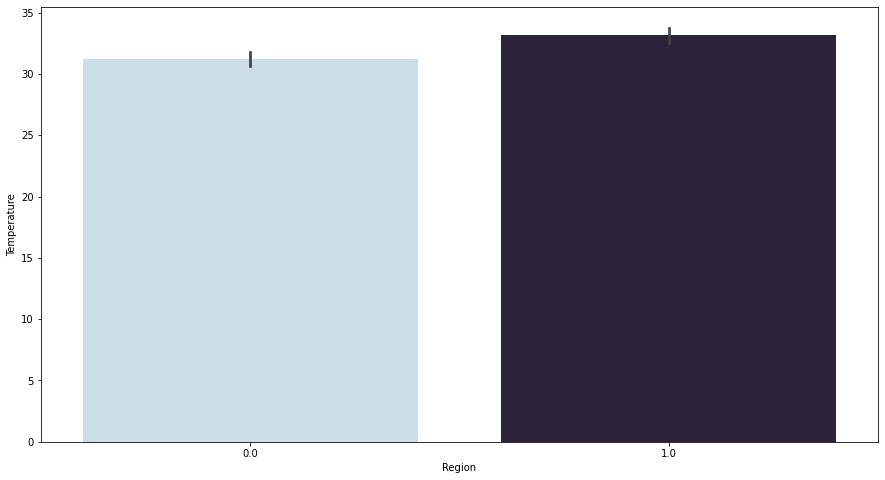

In [47]:
plt.figure(figsize = (15,8))
sns.barplot(x = data['Region'], y = data['Temperature'], palette="ch:s=.25,rot=-.25")

- `Sidi - Bel Abbes region` mostly effected by temperature

## <font color=green>Regression Plot</font>

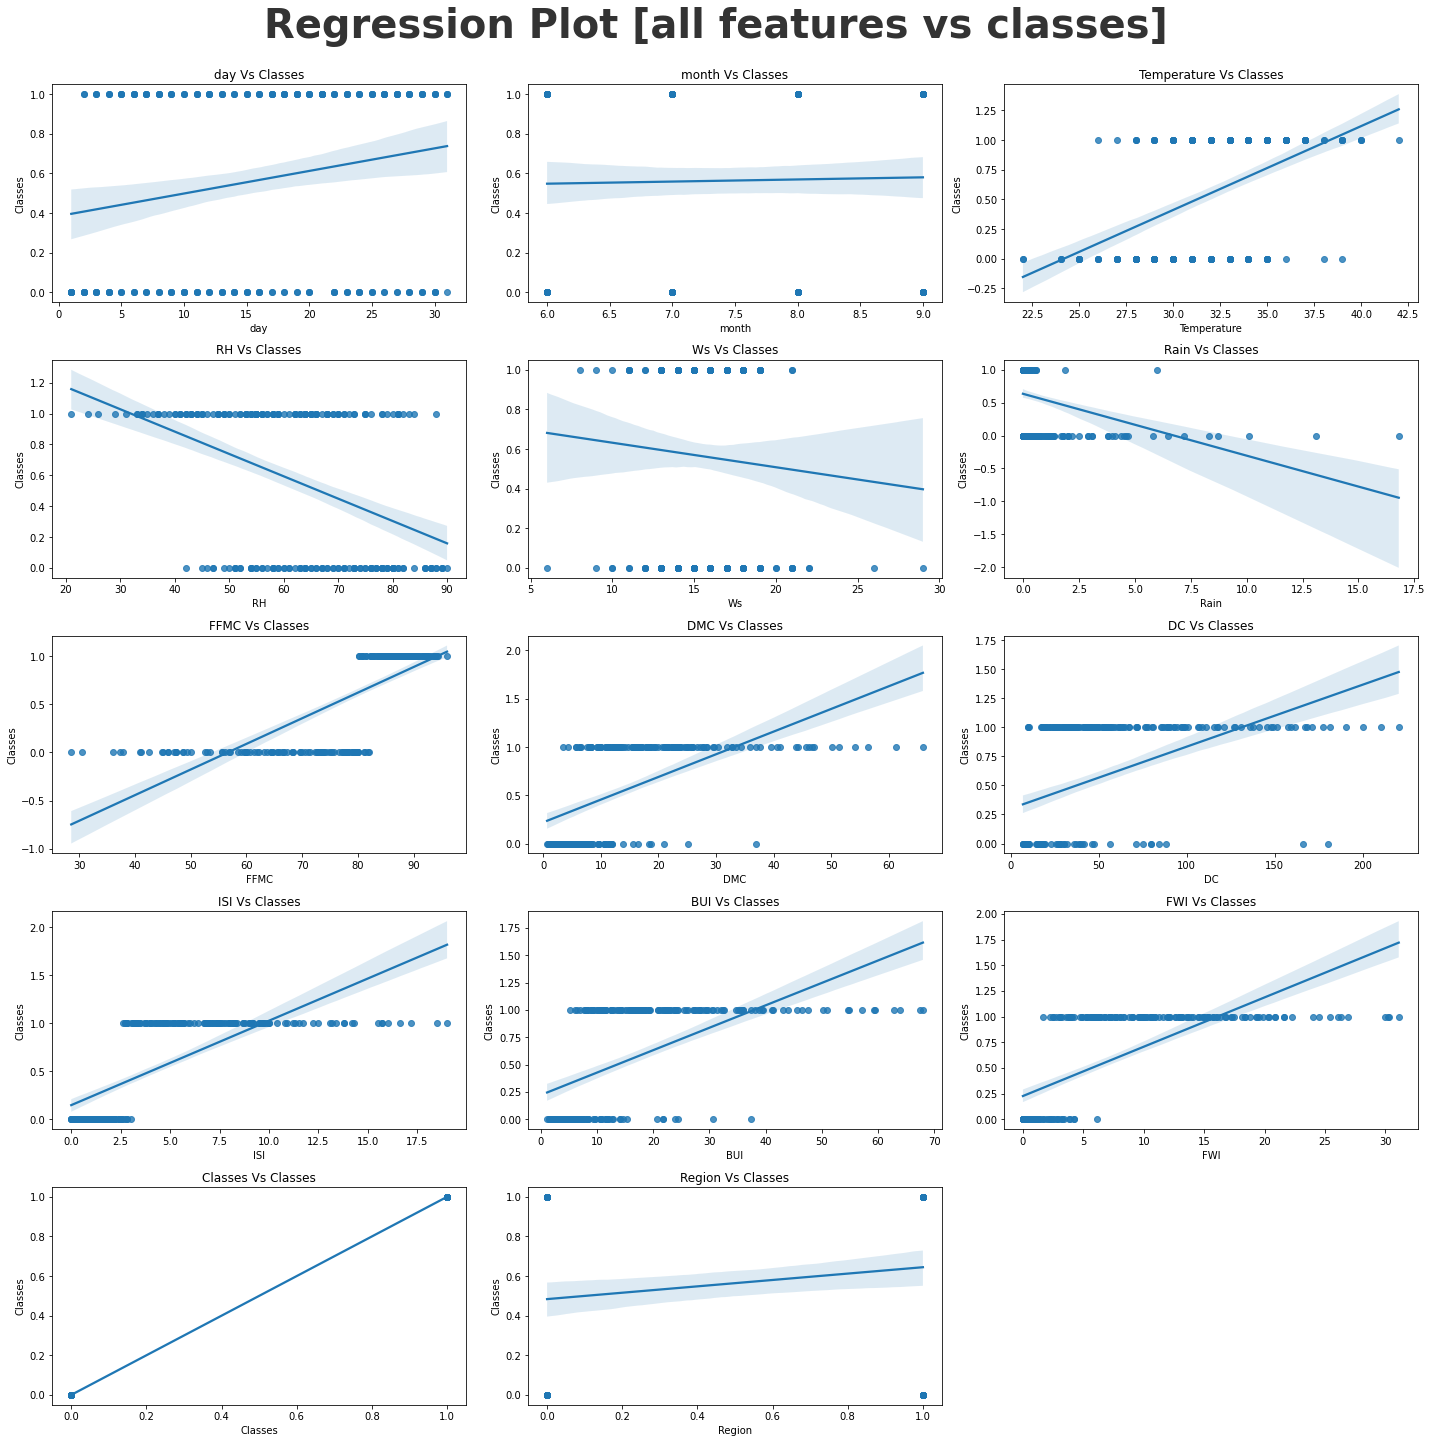

In [49]:
plt.figure(figsize = (20,20))
plt.suptitle('Regression Plot [all features vs classes]', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.regplot(x= data[data.columns[i]],y = data['Classes'], data = data)
    plt.xlabel(data.columns[i])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(data.columns[i]))
    plt.tight_layout()

## <font color=green>Boxplot to find outliers</font>

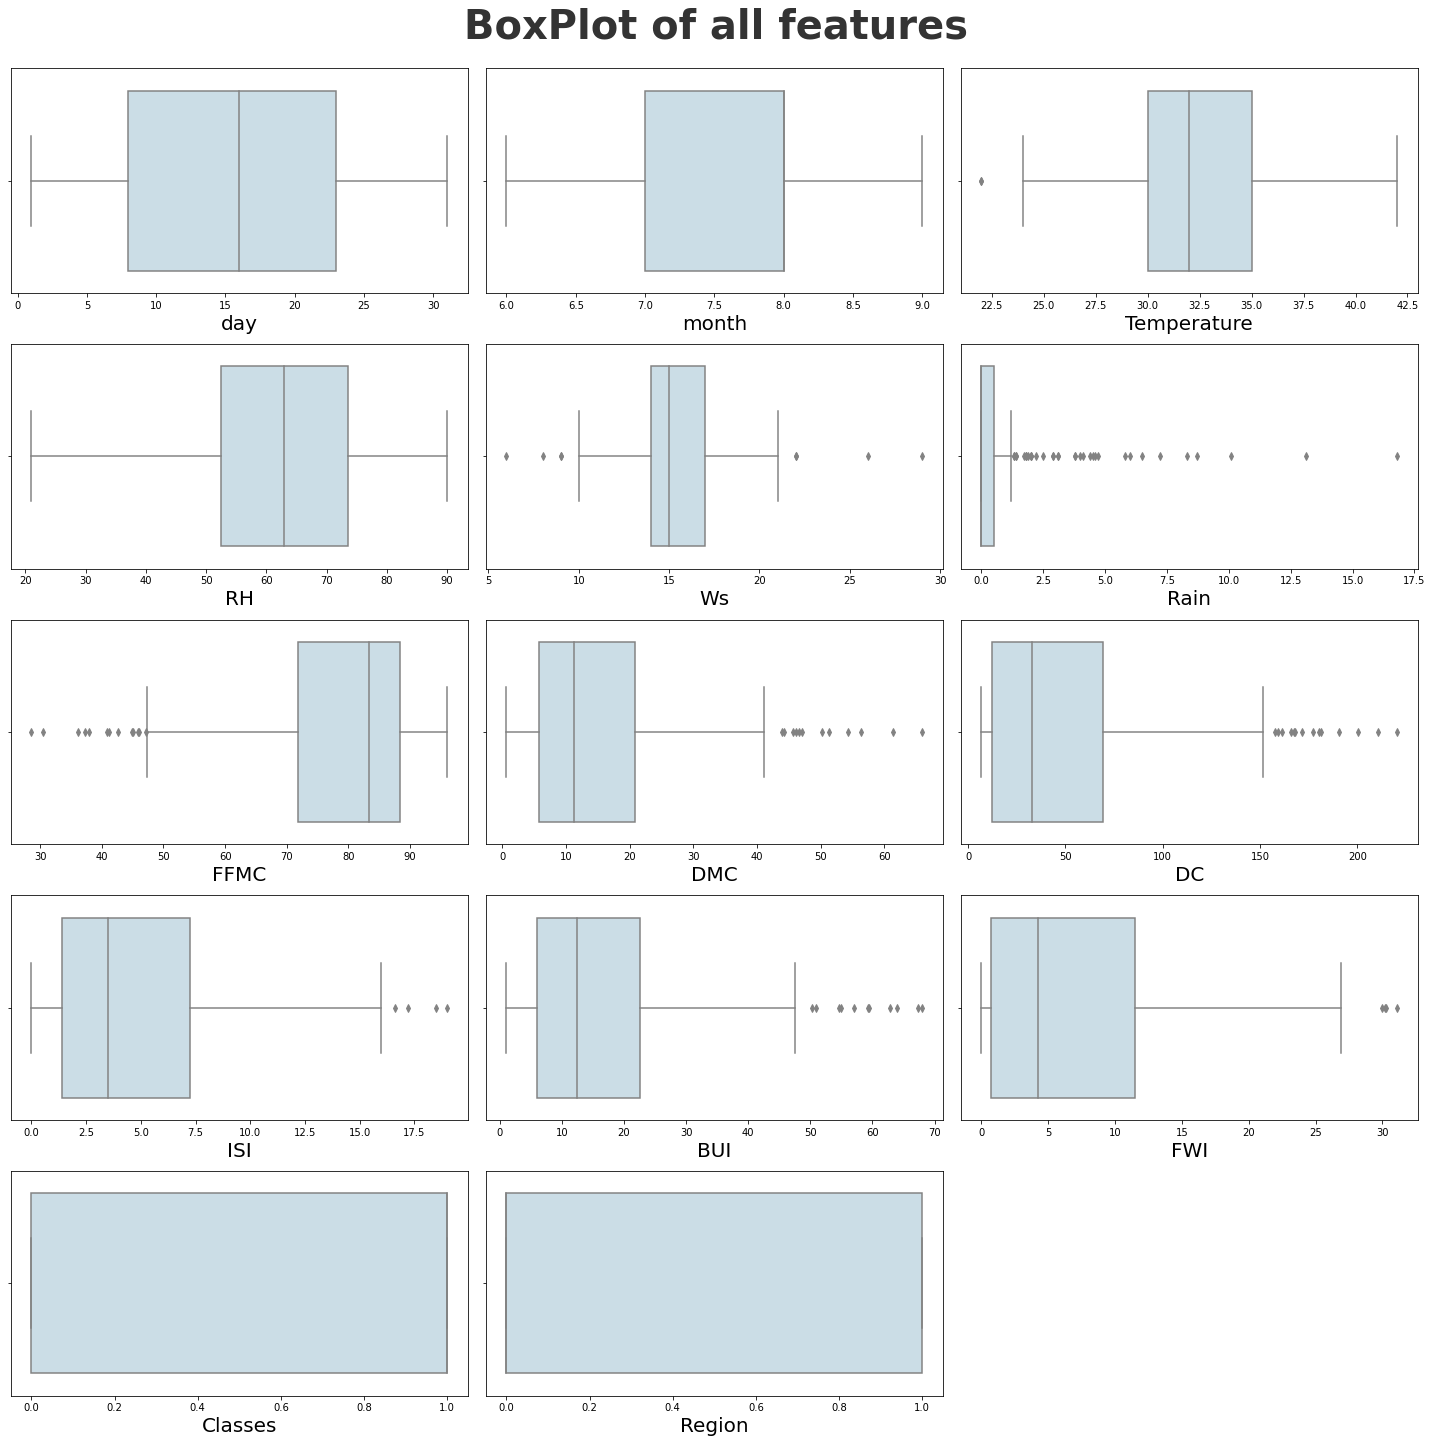

In [50]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x= data[data.columns[i]], data = data, palette="ch:s=.25,rot=-.25")
    plt.xlabel(data.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

- `Ws`, `Rain`, `FFMC`, `DMC`,` DC`, `BUI` has many outliers

## <font color=green>Handling the Outliers</font>

In [53]:
def find_boundaries(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_boundary = data[column].quantile(0.25) - (1.5 * IQR)
    higher_boundary = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Boundary:",lower_boundary)
    print("Higher Boundary:",  higher_boundary)
    print("-----------------------------------------------------------------------")
    data.loc[data[column] <= lower_boundary, column] = lower_boundary
    data.loc[data[column] >= higher_boundary, column] =  higher_boundary

In [54]:
for columns in data:
    find_boundaries(data,columns)

day --- IQR ---> 15.0
Lower Boundary: -14.5
Higher Boundary: 45.5
-----------------------------------------------------------------------
month --- IQR ---> 1.0
Lower Boundary: 5.5
Higher Boundary: 9.5
-----------------------------------------------------------------------
Temperature --- IQR ---> 5.0
Lower Boundary: 22.5
Higher Boundary: 42.5
-----------------------------------------------------------------------
RH --- IQR ---> 21.0
Lower Boundary: 21.0
Higher Boundary: 105.0
-----------------------------------------------------------------------
Ws --- IQR ---> 3.0
Lower Boundary: 9.5
Higher Boundary: 21.5
-----------------------------------------------------------------------
Rain --- IQR ---> 0.5
Lower Boundary: -0.75
Higher Boundary: 1.25
-----------------------------------------------------------------------
FFMC --- IQR ---> 16.450000000000003
Lower Boundary: 47.17499999999999
Higher Boundary: 112.975
-----------------------------------------------------------------------
DMC -

## <font color=green>Rechecking the outliers after dropping it</font>

<AxesSubplot: >

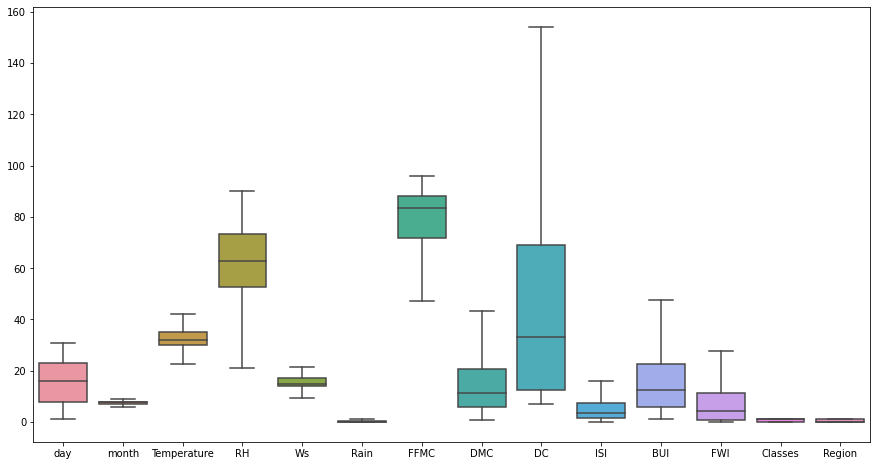

In [55]:
plt.figure(figsize = (15,8))
sns.boxplot(data = data)

- Outlier is not present in any of the feature

## <font color=green>Creating Independent and Dependent Features</font>

In [56]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

### $\color{#F4D03F}{\text{Independent Features}}$

In [57]:
X.head()

day  month  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  \
0  1.0    6.0         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5   
1  2.0    6.0         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4   
2  3.0    6.0         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1   
3  4.0    6.0         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0   
4  5.0    6.0         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5   

   Region  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

### $\color{#F4D03F}{\text{Dependent Features}}$

In [58]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

## <font color=green>Importing sklearn libraries for machine learning</font>

In [63]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## <font color=green>Train Test Split</font>

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## <font color=green>Logistic Regression Model Training</font>

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [66]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [67]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

## <font color=green>Standardizing or Feature Selection</font>

In [68]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [69]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}


In [70]:
print(classifier_regressor.best_score_)

0.9647058823529411


## <font color=green>Prediction</font>

In [71]:
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1.])

## <font color=green>Accuracy Score</font>

In [72]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.958904109589041


## <font color=green>Classification Report</font>

In [73]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.98      0.96      0.97        45

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



## Performance Metrics

## <font color=green>Confusion Matrix</font>

In [74]:
conf_Max = confusion_matrix(y_pred,y_test)
conf_Max

array([[27,  1],
       [ 2, 43]], dtype=int64)

In [75]:
true_positive = conf_Max[0][0]
false_positive = conf_Max[0][1]
false_negative = conf_Max[1][0]
true_negative = conf_Max[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 27
false_positive: 1
true_negative: 43
false_negative: 2


## <font color=green>Calculate using theorical formula of Accuracy, Precision, Recall, F1-score</font>

In [76]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.958904109589041

## <font color=green>Precision</font>

In [77]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9642857142857143

## <font color=green>Recall</font>

In [78]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9310344827586207

## <font color=green>F1-Score</font>

In [79]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9473684210526316

## <font color=green>Area Under Curve</font>

In [80]:
auc = roc_auc_score(y_pred, y_test)
auc

0.9599206349206351

## <font color=green>Roc</font>

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

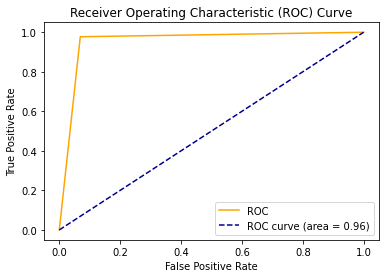

In [82]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In real life, we create various models using different algorithms that we can use for classification purpose. We use `AUC` to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. 
We will calculate AUC for all the models seperately. The model with` highest AUC` value will be the `best model `to use.

## <font color=green>Creating Inbalance dataset from the original balanced dataset</font>

In [83]:
df.shape

(243, 15)

In [84]:
# creating imbalance
# 1. splitting data in 9:1 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1 = pd.DataFrame(df, columns = ['Classes'])

In [85]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

In [86]:
y1.head()

Classes
0        0
1        0
2        0
3        0
4        0

In [87]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [88]:
## Both will have same shape
X_train_imb.shape, y_train_imb.shape

((218, 13), (218, 1))

## <font color=green>Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance</font>

In [89]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
158        1
186        1
11         1
75         1
132        1

In [90]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
158        1
186        1
11         1
75         1
132        1

In [91]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
158  15.0     1.0  
186  13.5     1.0  
11    7.1     0.0  
75    6.3     0.0  
132   1.9     1.0

In [92]:
# combining X_train_imb and y_train_imb
train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  Classes  
158  15.0     1.0        1  
186  13.5     1.0        1  
11    7.1     0.0        1  
75    6.3     0.0        1  
132   1.9     1.0        1

In [93]:
# combining X_test_imb with y_test_imb
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))

In [96]:
test_imb.shape, train_imb.shape

((25, 14), (218, 14))

In [99]:
# combining train_imb dataset and test_imb dataset into data_imb dataset
df_imb = pd.concat([train_imb, test_imb], ignore_index  = True, sort=False)
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <font color=green>Checking the inbalancing</font>

In [101]:
df_imb.Classes.value_counts()

1    233
0     10
Name: Classes, dtype: int64

<AxesSubplot: xlabel='Classes', ylabel='count'>

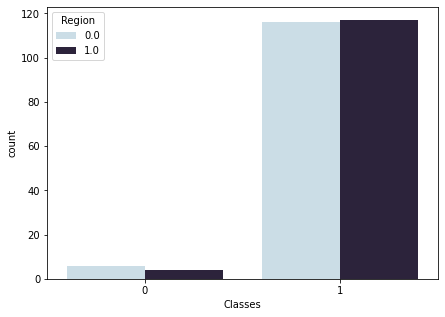

In [103]:
# 0: 'Bejaia region' and 1: 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data = df_imb, x='Classes', hue='Region',palette="ch:s=.25,rot=-.25")

## <font color=green>Logistic regression on inbalance data</font>

In [105]:
# Seperating Independent and Dependent Feature
y1 = df_imb['Classes']
X1 = df_imb.drop(columns='Classes')

In [109]:
# Handling Inbalance dataset by doing Upsampling

#for Upsampling
from imblearn.combine import SMOTETomek

In [110]:
smk = SMOTETomek()
smk

SMOTETomek()

In [111]:
X_bal, y_bal = smk.fit_resample(X1, y1)

In [112]:
X_bal.shape,y_bal.shape

((462, 13), (462,))

In [113]:
# creating balanced data from imbalanced data
data_bal = X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <font color=green>EDA on balanced dataset</font>

In [114]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          462 non-null    int64  
 1   month        462 non-null    int64  
 2   Temperature  462 non-null    int64  
 3   RH           462 non-null    int64  
 4   Ws           462 non-null    int64  
 5   Rain         462 non-null    float64
 6   FFMC         462 non-null    float64
 7   DMC          462 non-null    float64
 8   DC           462 non-null    float64
 9   ISI          462 non-null    float64
 10  BUI          462 non-null    float64
 11  FWI          462 non-null    float64
 12  Region       462 non-null    float64
 13  Classes      462 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 50.7 KB


## <font color=green>Statistical analysis on balanced dataset</font>

In [115]:
data_bal.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [118]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.107320     0.321220 -0.155548 -0.064154 -0.022625   
month       -0.107320  1.000000    -0.092981  0.104735 -0.047298  0.021905   
Temperature  0.321220 -0.092981     1.000000 -0.583157 -0.330115 -0.186737   
RH          -0.155548  0.104735    -0.583157  1.000000  0.030149  0.167300   
Ws          -0.064154 -0.047298    -0.330115  0.030149  1.000000  0.070438   
Rain        -0.022625  0.021905    -0.186737  0.167300  0.070438  1.000000   
FFMC         0.327835  0.066278     0.624004 -0.663478 -0.004014 -0.437343   
DMC          0.594731 -0.032510     0.525637 -0.480403  0.086625 -0.203563   
DC           0.574985  0.071909     0.386239 -0.335709  0.167874 -0.244289   
ISI          0.285177  0.071730     0.548005 -0.650963  0.165874 -0.275653   
BUI          0.604690 -0.003777     0.493814 -0.442458  0.114467 -0.220791   
FWI          0.419683  0.064495     0.530075 -0.573893  0.170384 -0.252110   
Region       0.205881 -0.045563     0.322424 -0.325305 -0.136707 -0.021243   
Classes      0.330209  0.056423     0.222792 -0.283852  0.297672  0.044036   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.327835  0.594731  0.574985  0.285177  0.604690  0.419683   
month        0.066278 -0.032510  0.071909  0.071730 -0.003777  0.064495   
Temperature  0.624004  0.525637  0.386239  0.548005  0.493814  0.530075   
RH          -0.663478 -0.480403 -0.335709 -0.650963 -0.442458 -0.573893   
Ws          -0.004014  0.086625  0.167874  0.165874  0.114467  0.170384   
Rain        -0.437343 -0.203563 -0.244289 -0.275653 -0.220791 -0.252110   
FFMC         1.000000  0.663535  0.598120  0.769671  0.661820  0.728945   
DMC          0.663535  1.000000  0.888967  0.720543  0.985314  0.874665   
DC           0.598120  0.888967  1.000000  0.594856  0.947035  0.776192   
ISI          0.769671  0.720543  0.594856  1.000000  0.698199  0.941347   
BUI          0.661820  0.985314  0.947035  0.698199  1.000000  0.865876   
FWI          0.728945  0.874665  0.776192  0.941347  0.865876  1.000000   
Region       0.245795  0.279844  0.057909  0.276308  0.201524  0.238767   
Classes      0.444318  0.430277  0.401704  0.533428  0.431180  0.526649   

               Region   Classes  
day          0.205881  0.330209  
month       -0.045563  0.056423  
Temperature  0.322424  0.222792  
RH          -0.325305 -0.283852  
Ws          -0.136707  0.297672  
Rain        -0.021243  0.044036  
FFMC         0.245795  0.444318  
DMC          0.279844  0.430277  
DC           0.057909  0.401704  
ISI          0.276308  0.533428  
BUI          0.201524  0.431180  
FWI          0.238767  0.526649  
Region       1.000000  0.195387  
Classes      0.195387  1.000000

In [119]:
num_data_bal = [fea for fea in data_bal.columns if data_bal[fea].dtype != 'O']
num_data_bal

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

## <font color=green>Comparing the distribution in feature for Original and Balanced dataset</font>

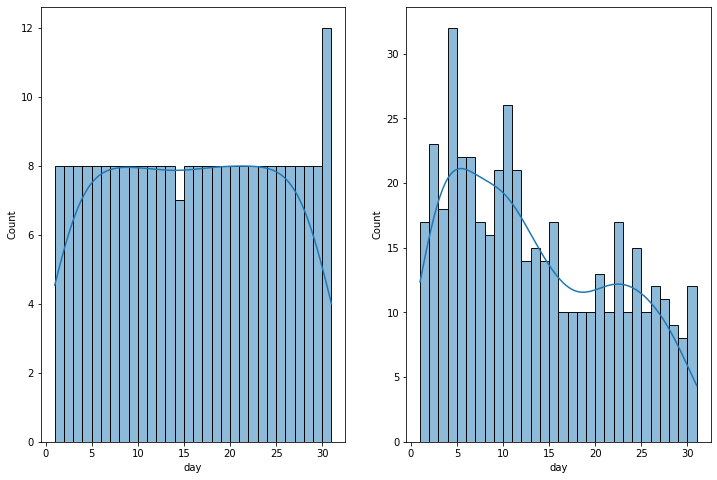

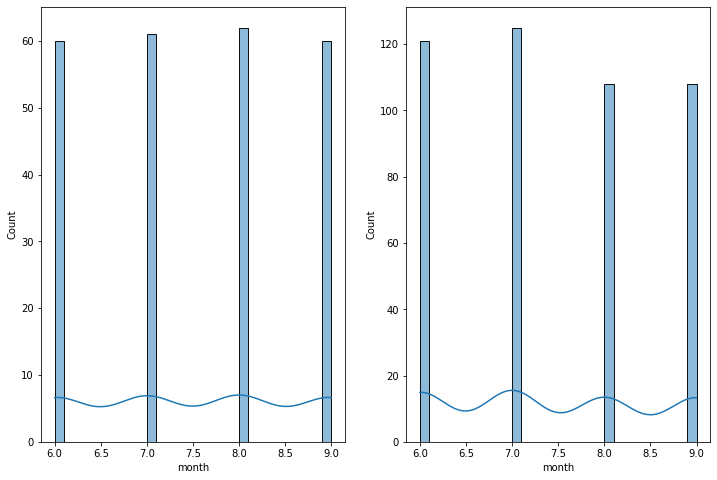

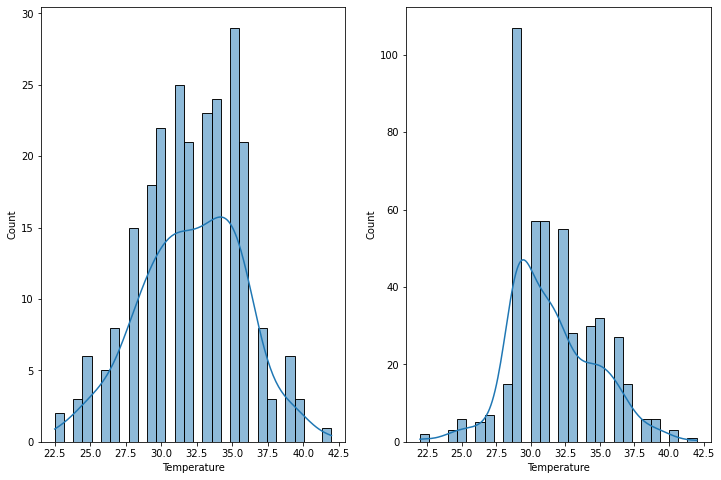

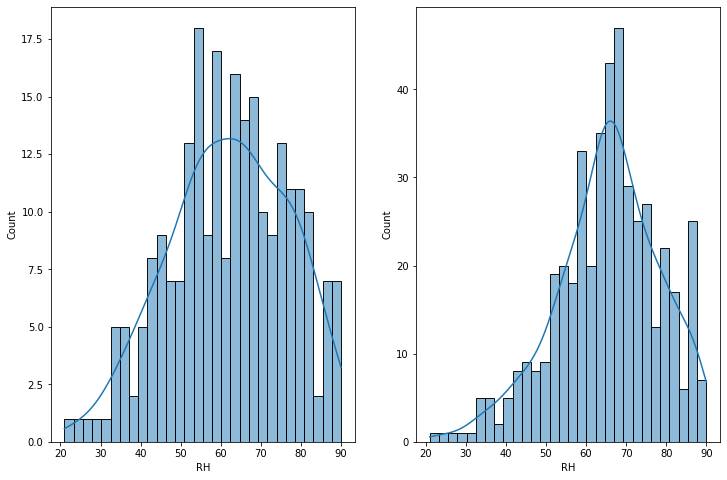

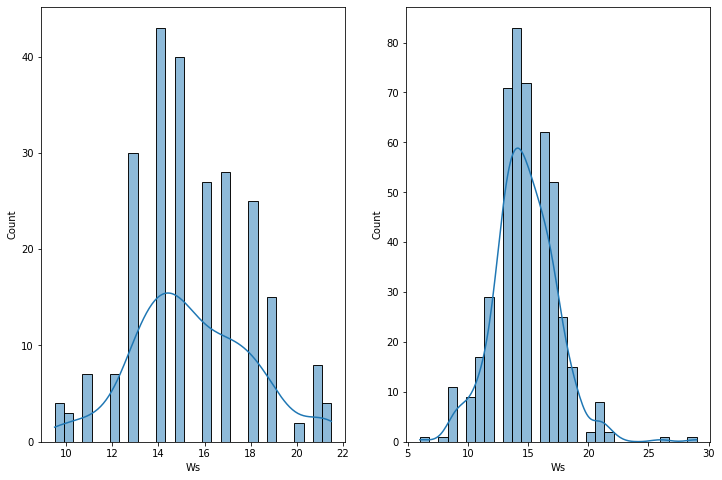

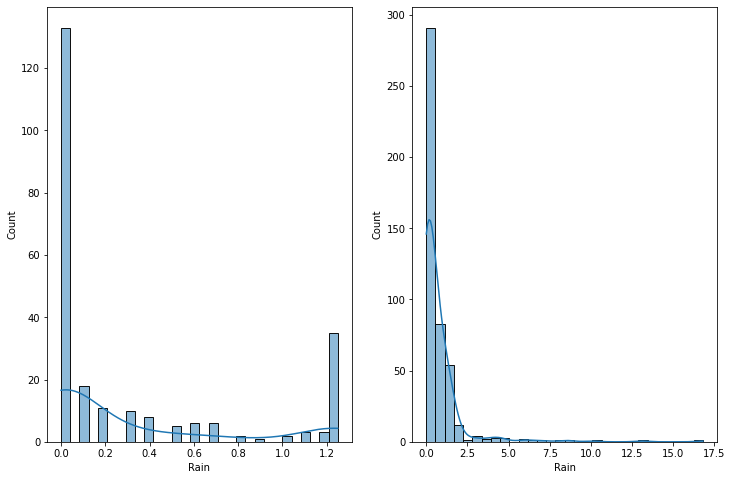

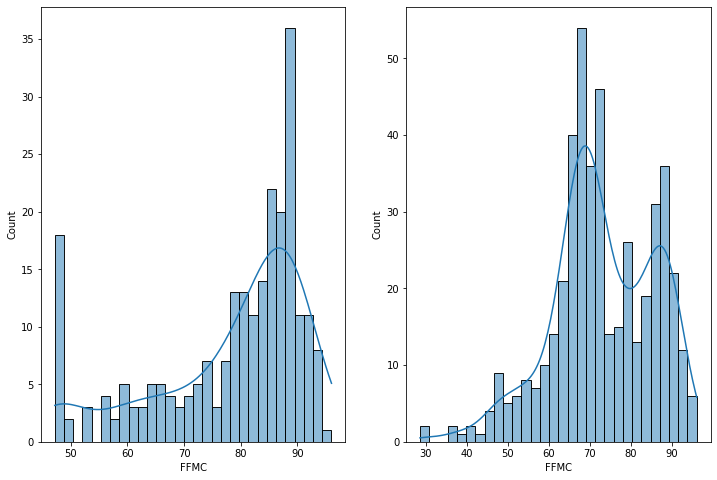

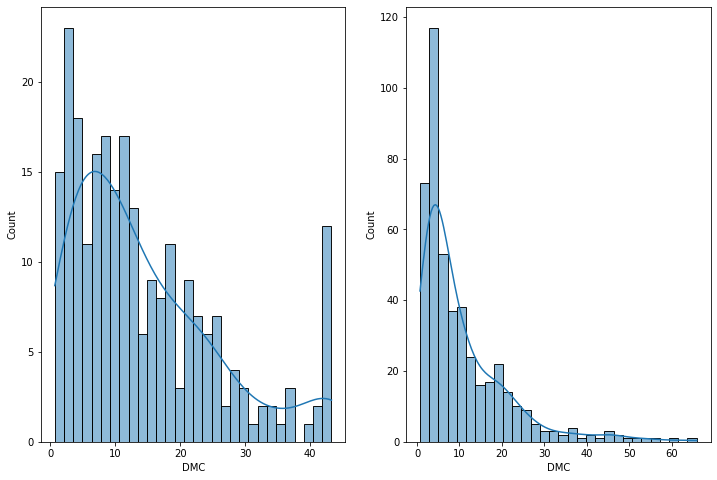

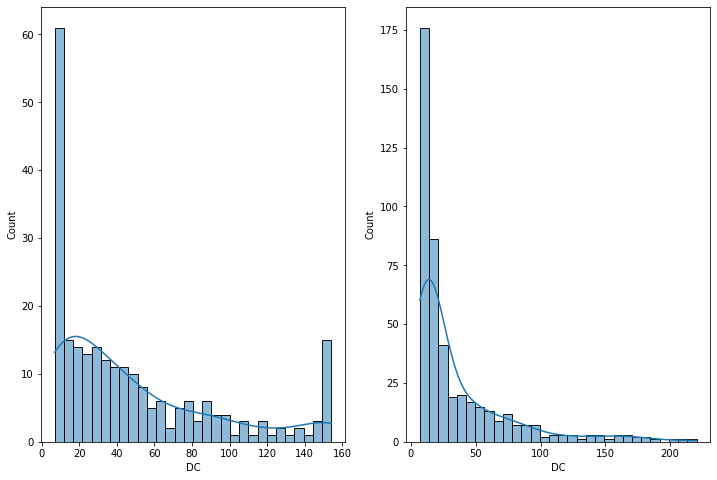

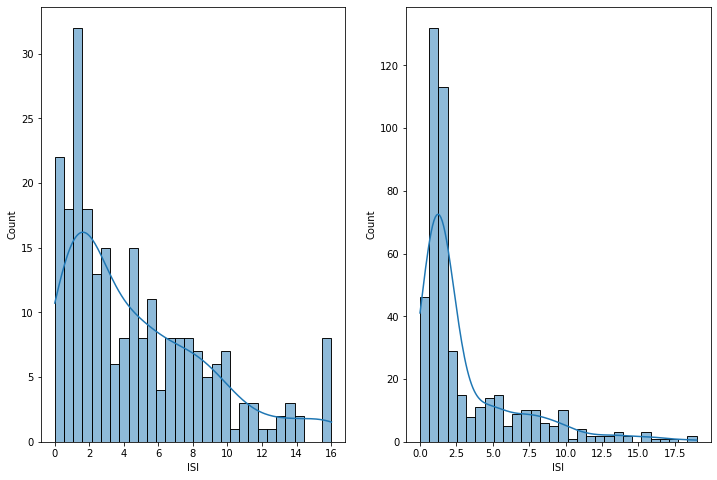

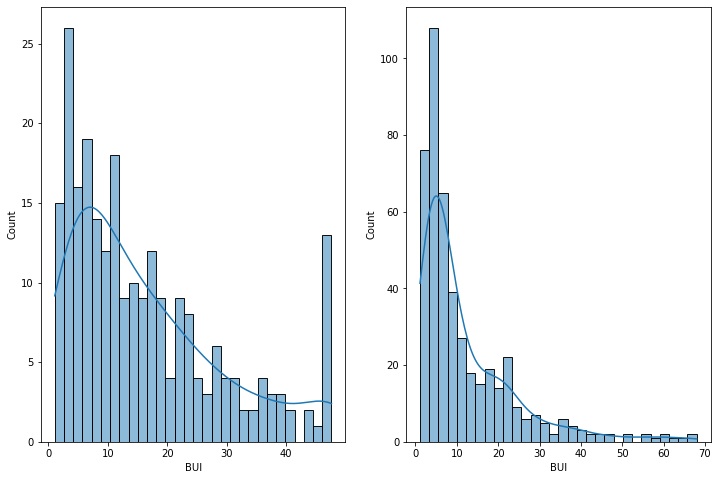

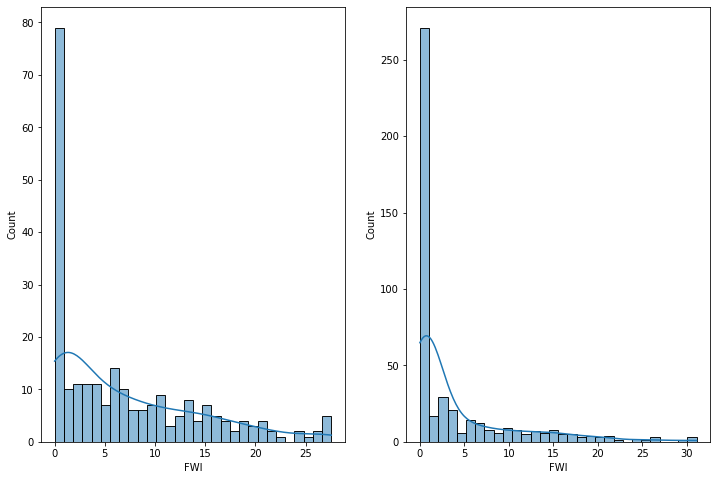

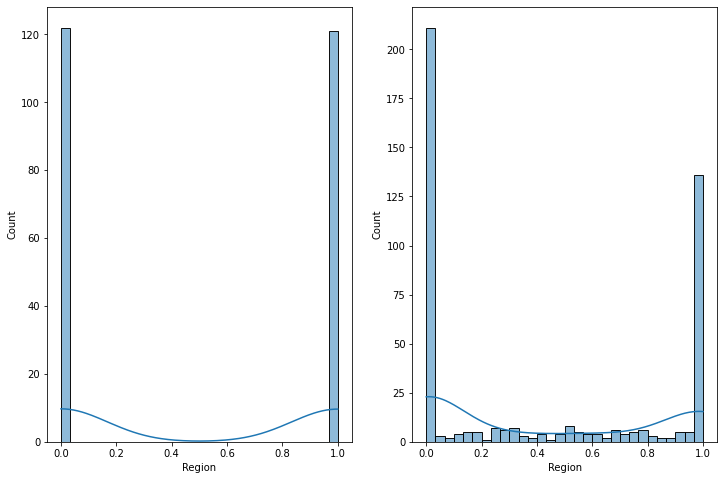

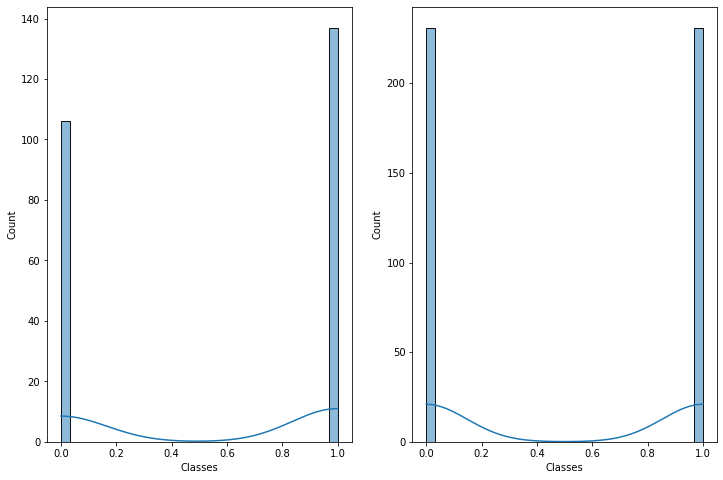

In [120]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.histplot(data = data,x = i, kde = True,bins = 30)
    
    plt.subplot(122)
    sns.histplot(data =data_bal , x = i, kde = True, bins = 30)

## <font color=green>Checking the Outliers for Original and Balanced Dataset</font>

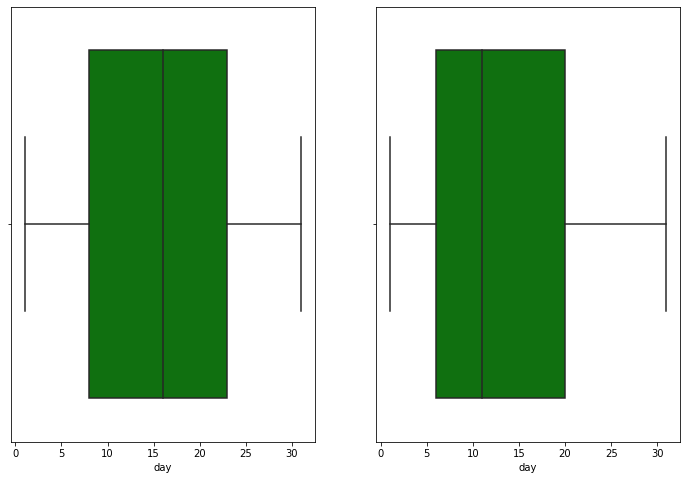

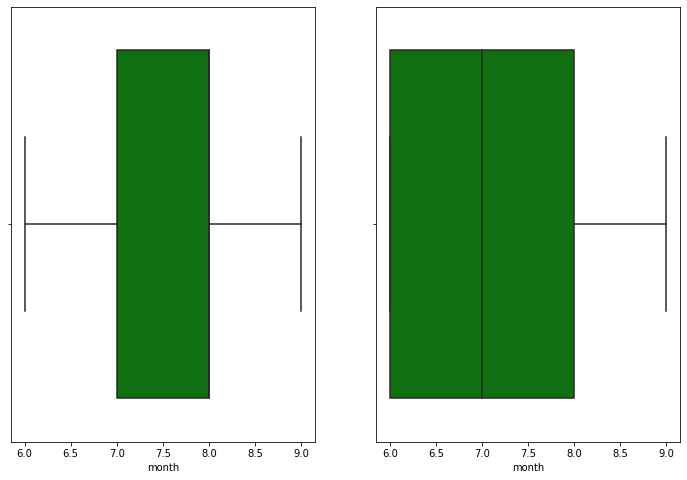

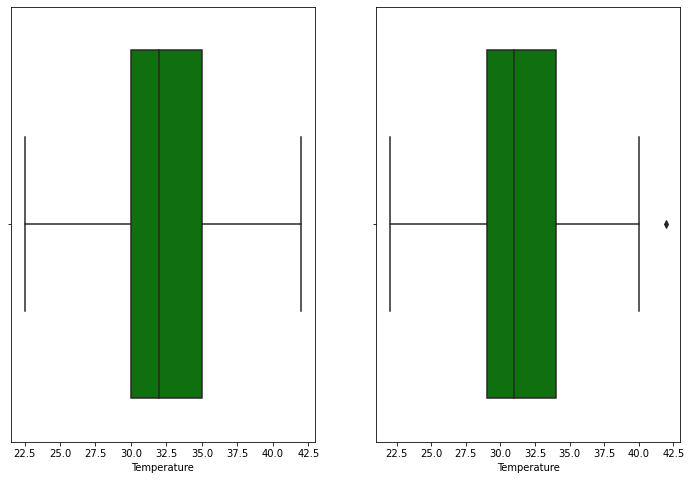

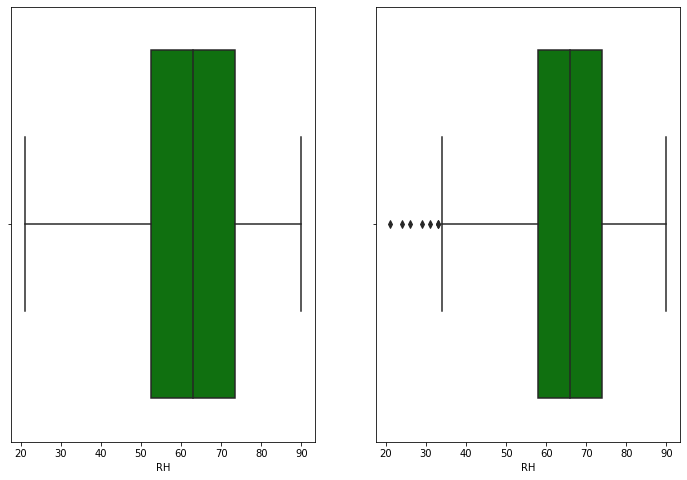

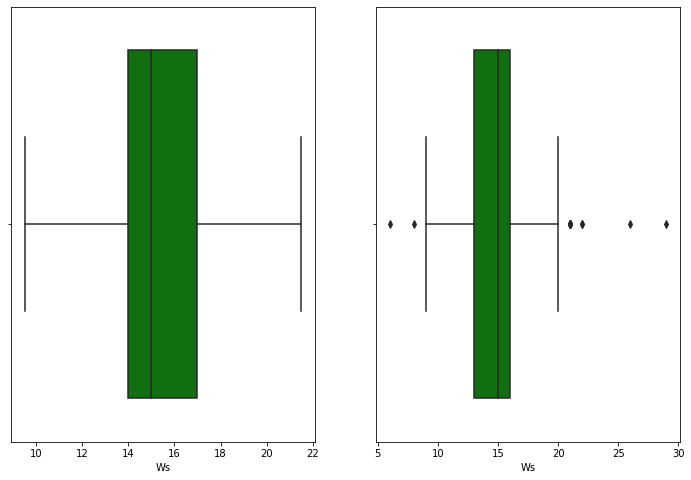

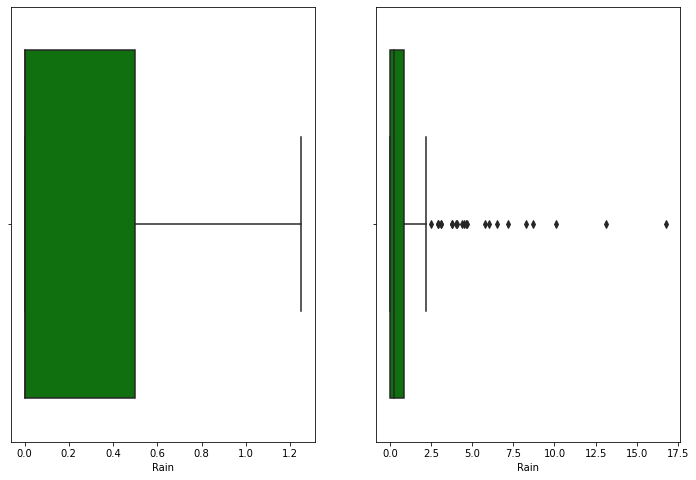

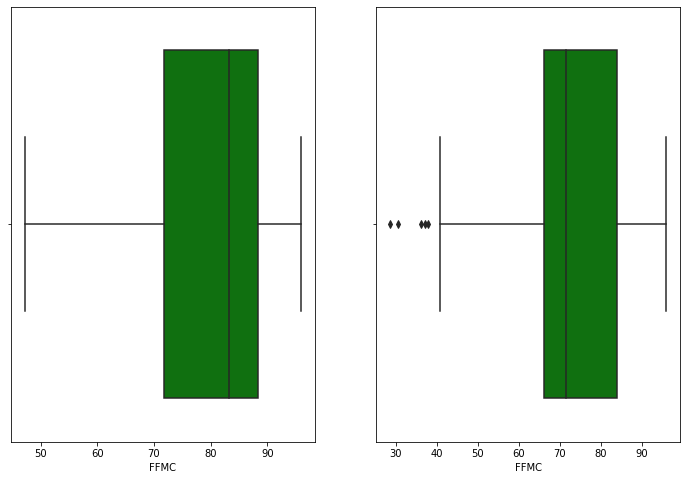

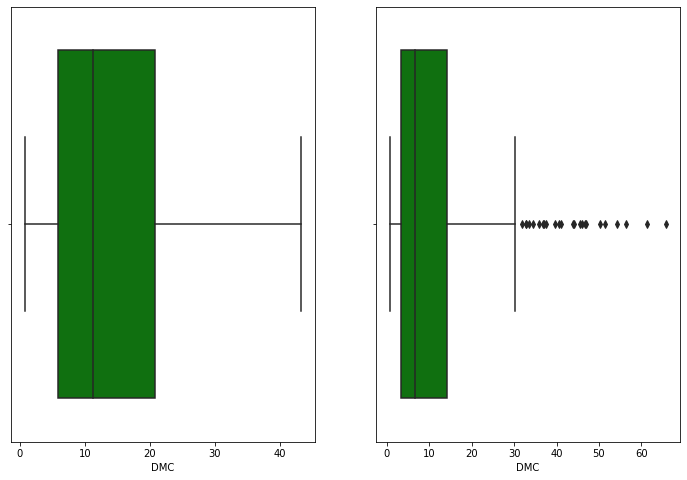

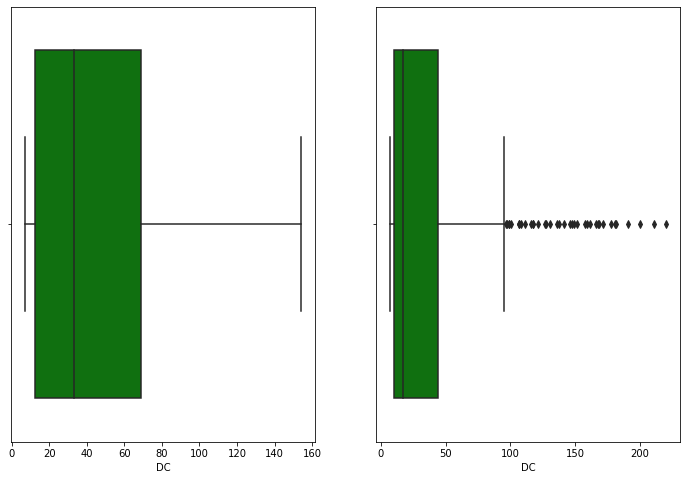

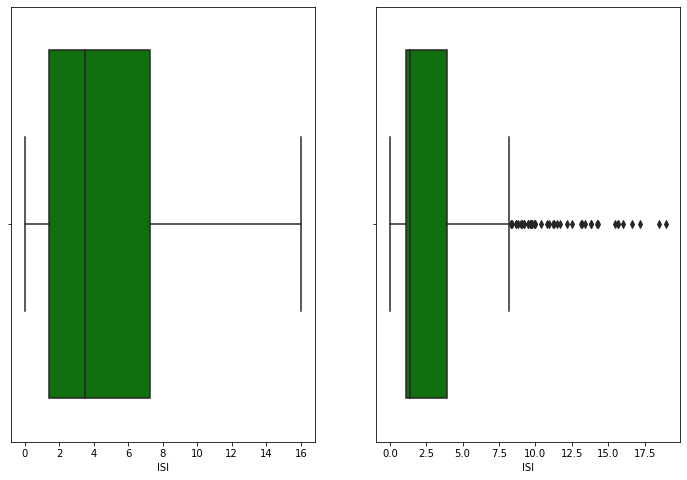

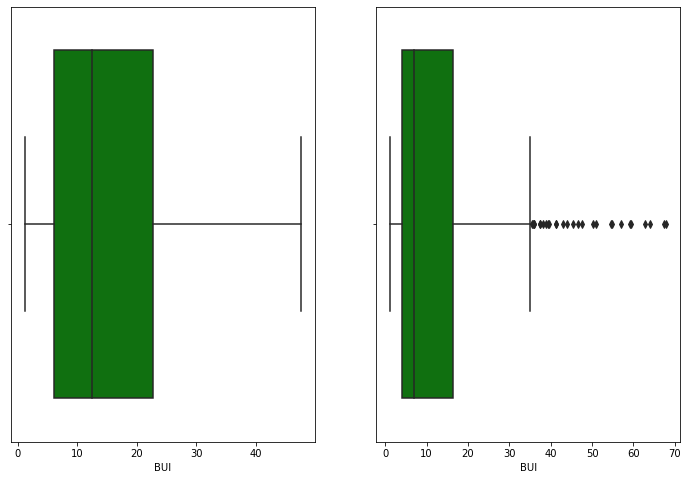

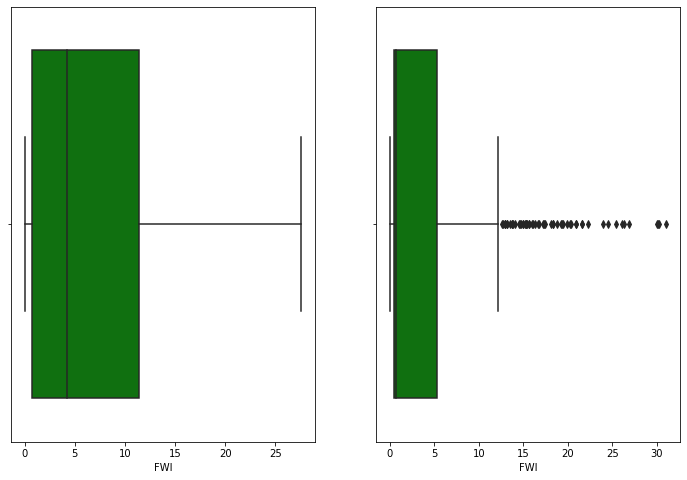

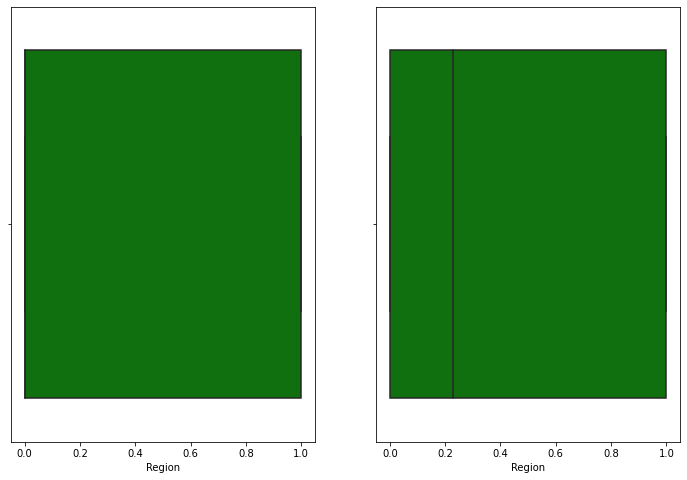

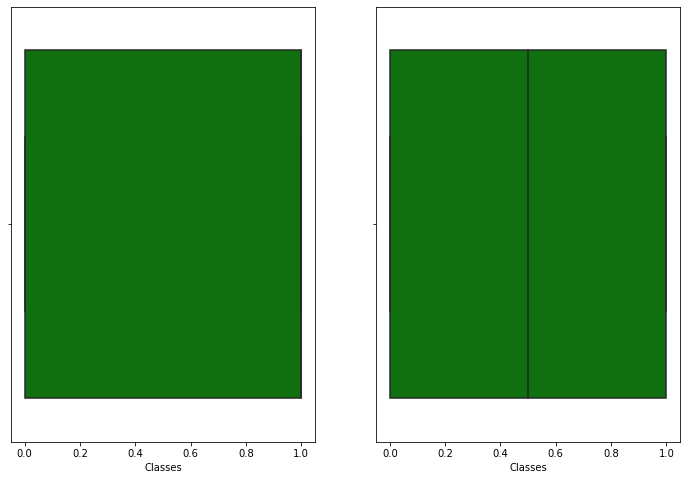

In [121]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.boxplot(data = data,x = i,color ='g')
    
    plt.subplot(122)
    sns.boxplot(data =data_bal , x = i, color = 'g')

## <font color=green>Test Train Split</font>

In [122]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

## <font color=green>Logistic Regression Model</font>

In [123]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [124]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [125]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## <font color=green>Standarizing or Feature Scaling</font>

In [126]:
classifier_regressor_bal.fit(X_train1,y_train1)
print(classifier_regressor_bal.best_params_)
print(classifier_regressor_bal.best_score_)


{'C': 20, 'max_iter': 200, 'penalty': 'l2'}
0.9132692307692307


## <font color=green>Prediction</font>

In [127]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)
y_bal_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

## <font color=green>Accuracy</font>

In [128]:
from sklearn.metrics import accuracy_score,classification_report
bal_score = accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.920863309352518


## <font color=green>Classification Report</font>

In [129]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        87
           1       0.83      1.00      0.90        52

    accuracy                           0.92       139
   macro avg       0.91      0.94      0.92       139
weighted avg       0.93      0.92      0.92       139



## Performance Metrics

## <font color=green>Confusion Metrics</font>

In [130]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)
conf_mat_bal

array([[76, 11],
       [ 0, 52]], dtype=int64)

In [131]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 76
false_positive: 11
true_negative: 52
false_negative: 0


## <font color=green>Precision</font>

In [132]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.8735632183908046

## <font color=green>Recall</font>

In [133]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

1.0

## <font color=green>F1-Score</font>

In [134]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.9325153374233129

# <font color=green>Conclusion</font>

## <font color=green>Performance of Logistic Model on Original Dataset</font>

In [135]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.98      0.96      0.97        45

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



## <font color=green>Performance of logistic model on balanced dataset which are created from imbalanced dataset</font>

In [136]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        87
           1       0.83      1.00      0.90        52

    accuracy                           0.92       139
   macro avg       0.91      0.94      0.92       139
weighted avg       0.93      0.92      0.92       139



In [137]:
auc = roc_auc_score(y_pred, y_test)
print("Area under curve of original dataset",auc)

Area under curve of original dataset 0.9599206349206351


In [138]:
auc1 = roc_auc_score(y_bal_pred, y_test1)
print("Area under curve of balaced dataset",auc1)

Area under curve of balaced dataset 0.9367816091954023


## Observation
- It seems that model is `good` when `we predict from original dataset`
- It seems that model is very `bad` when we try to `predict from balanced(created from an imbalanced dataset )`
- Also the area under curve `(AUC)` of `original dataset` is `more`, so that model is good